In [82]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [92]:
activation_data = pd.read_csv('Desktop/Activation Data.csv', delimiter=',', header=0)
claim_data = pd.read_csv('Desktop/Claim Data.csv', delimiter=',', header=0)
result=activation_data.loc[activation_data['Calim Status']=='Yes']
result


,Serial Number,Warranty ID,City,EW Amount,EW Duration,Activation Date,Year,Product Category_Name,Product Purchase Date,Brand,Brand 1,Type,Product Price,Insured,Calim Status
4,27591,AMD921665,AMD,1450.0,2,03-Mar-18,2017-18,Television,25-07-2017,LG,Lg,Brand,14500,No,Yes
5,27592,AMD401361,AMD,1450.0,2,03-Mar-18,2017-18,Television,10-07-2017,Sony,Sony,Brand,14990,No,Yes
14,37655,DEL250119,DEL,0.0,2,09-Nov-17,2017-18,Television,05-11-2017,DEN,Den-Aiwa,OEM,13700,No,Yes
24,39299,DEL980089,DEL,0.0,2,11-Apr-17,2017-18,Television,24-03-2017,DENAIWA,Den-Aiwa,OEM,14500,No,Yes
27,39397,DEL800651,DEL,0.0,2,14-Oct-17,2017-18,Television,21-09-2017,DEN,Den-Aiwa,OEM,12500,No,Yes
39,40204,DEL134994,DEL,700.0,2,05-Jan-18,2017-18,Television,18-11-2017,DEN Aiva,Den-Aiwa,OEM,13000,No,Yes
114,98544,GZB170443,GZB,2625.0,2,13-Jan-18,2017-18,Air Conditioner,20-04-2017,Daikin,Daikin,Brand,29500,No,Yes
127,99221,LKO837277,LKO,0.0,2,25-Nov-17,2017-18,Television,25-09-2017,DMORE,Dmore,OEM,40000,No,Yes
134,100222,DEL329472,DEL,5775.0,2,09-Jun-17,2017-18,Air Conditioner,06-06-2017,Samsung,Samsung,Brand,43225,No,Yes
144,100288,DEL428482,DEL,5775.0,2,09-Jun-17,2017-18,Refrigerator,09-06-2017,LG,Lg,Brand,54500,No,Yes


In [5]:
furniture = df.loc[df['Category'] == 'Furniture']

In [6]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2012-01-07 00:00:00'), Timestamp('2015-12-31 00:00:00'))

In [7]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,7475,CA-2011-167199,2012-01-07,2012-01-11,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.8200,9,0.00,746.4078
14,7661,CA-2011-105417,2012-01-08,2012-01-13,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.7280,3,0.60,-53.7096
19,867,CA-2011-149020,2012-01-11,2012-01-16,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.9400,1,0.00,21.2954
20,717,CA-2011-130092,2012-01-12,2012-01-15,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.9400,2,0.00,3.0814
26,2979,CA-2011-109232,2012-01-14,2012-01-17,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.9400,6,0.00,87.3504
28,4939,CA-2011-157147,2012-01-14,2012-01-19,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,...,94109,West,FUR-BO-10003034,Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",333.9990,3,0.15,3.9294
32,6475,CA-2011-149524,2012-01-15,2012-01-16,First Class,BS-11590,Brendan Sweed,Corporate,United States,Philadelphia,...,19140,East,FUR-BO-10003433,Furniture,Bookcases,Sauder Cornerstone Collection Library,61.9600,4,0.50,-53.2856
34,971,CA-2011-115791,2012-01-17,2012-01-19,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Philadelphia,...,19134,East,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,127.1040,6,0.20,28.5984
42,5466,CA-2011-146591,2012-01-20,2012-01-21,First Class,TS-21340,Toby Swindell,Consumer,United States,Scottsdale,...,85254,West,FUR-BO-10001972,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,181.4700,5,0.70,-320.5970
45,1124,US-2011-147627,2012-01-21,2012-01-27,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Jonesboro,...,72401,South,FUR-FU-10003194,Furniture,Furnishings,"Eldon Expressions Desk Accessory, Wood Pencil ...",38.6000,4,0.00,11.5800


In [8]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [9]:
furniture = furniture.sort_values('Order Date')

In [10]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [12]:
furniture

,Order Date,Sales
0,2012-01-07,2573.8200
1,2012-01-08,76.7280
2,2012-01-11,51.9400
3,2012-01-12,9.9400
4,2012-01-14,879.9390
5,2012-01-15,61.9600
6,2012-01-17,127.1040
7,2012-01-20,181.4700
8,2012-01-21,1413.5100
9,2012-01-22,25.2480


In [13]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2012-01-07', '2012-01-08', '2012-01-11', '2012-01-12',
               '2012-01-14', '2012-01-15', '2012-01-17', '2012-01-20',
               '2012-01-21', '2012-01-22',
               ...
               '2015-12-19', '2015-12-20', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-26', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [14]:
y = furniture['Sales'].resample('MS').mean()
y['2015':]

Order Date
2015-01-01     397.602133
2015-02-01     528.179800
2015-03-01     557.754316
2015-04-01     452.636345
2015-05-01     664.111623
2015-06-01     768.314805
2015-07-01     661.034429
2015-08-01     828.292556
2015-09-01    1183.910960
2015-10-01     875.362728
2015-11-01    1175.963821
2015-12-01    1366.815185
Freq: MS, Name: Sales, dtype: float64

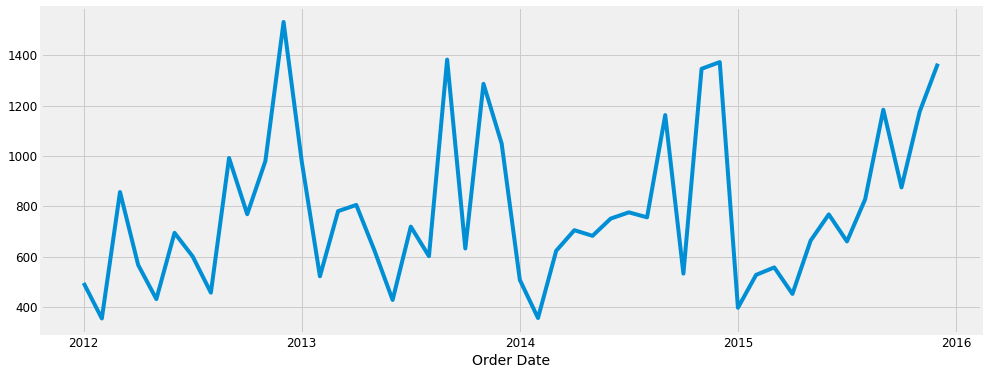

In [15]:
y.plot(figsize=(15, 6))
plt.show()

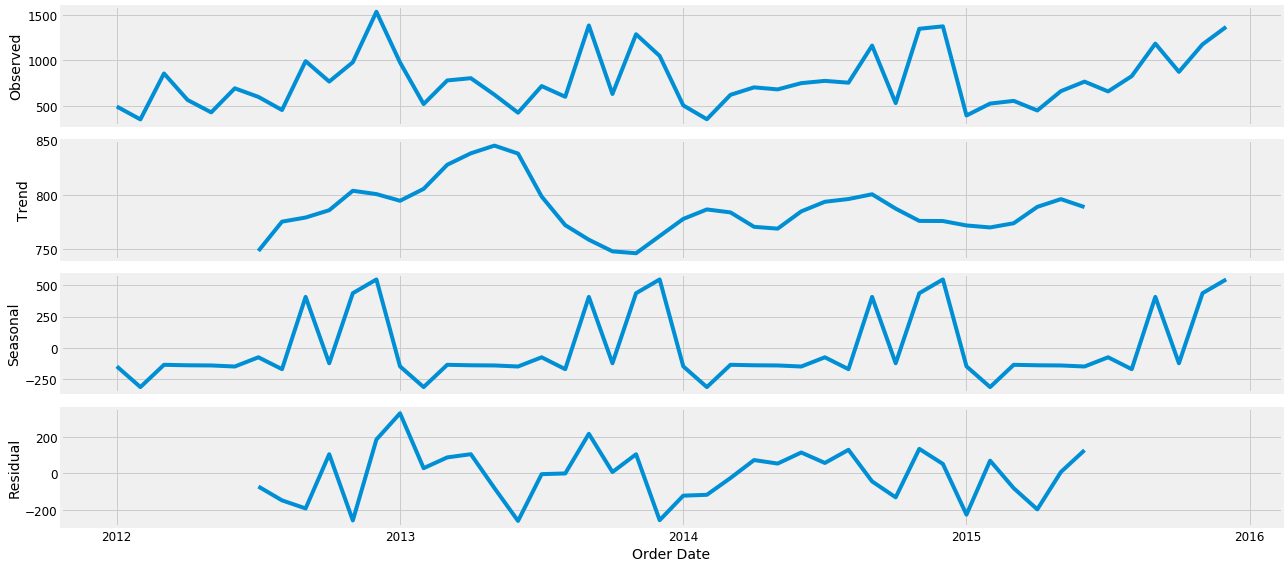

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
rolmean=y.rolling(window=12).mean()

In [18]:
rolstd=y.rolling(window=12).std()
print(rolmean,rolstd)

Order Date
2012-01-01           NaN
2012-02-01           NaN
2012-03-01           NaN
2012-04-01           NaN
2012-05-01           NaN
2012-06-01           NaN
2012-07-01           NaN
2012-08-01           NaN
2012-09-01           NaN
2012-10-01           NaN
2012-11-01           NaN
2012-12-01    727.959195
2013-01-01    768.154213
2013-02-01    782.099352
2013-03-01    775.761427
2013-04-01    795.622644
2013-05-01    811.701604
2013-06-01    789.493792
2013-07-01    799.371860
2013-08-01    811.446056
2013-09-01    843.982499
2013-10-01    832.646228
2013-11-01    858.186217
2013-12-01    817.940975
2014-01-01    778.762175
2014-02-01    764.968226
2014-03-01    751.836422
2014-04-01    743.480956
2014-05-01    748.334216
2014-06-01    775.260294
2014-07-01    779.987273
2014-08-01    792.838588
2014-09-01    774.486324
2014-10-01    766.171186
2014-11-01    771.144019
2014-12-01    798.107256
2015-01-01    788.892195
2015-02-01    803.168155
2015-03-01    797.676448
2015-04-01    

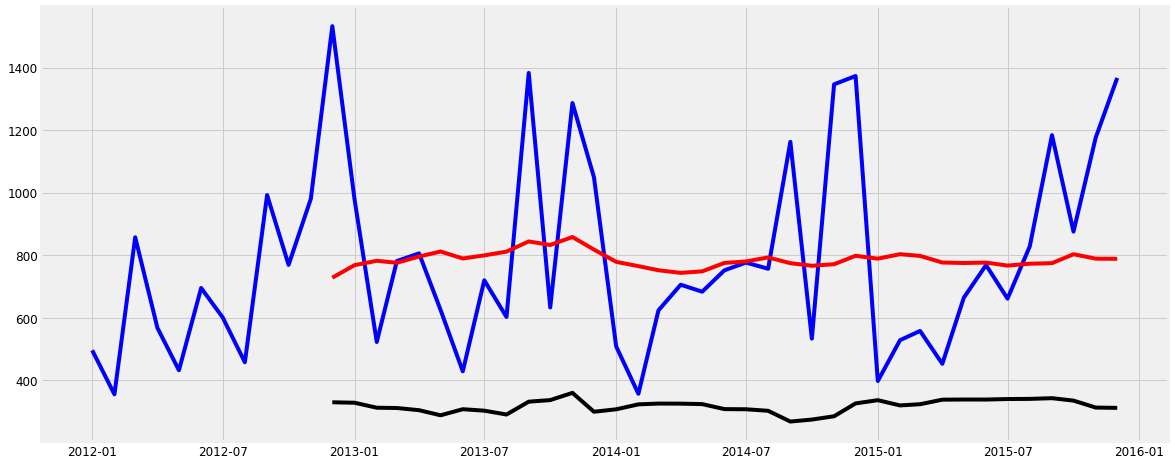

In [20]:
orig=plt.plot(y,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rollingmean')
std=plt.plot(rolstd,color='black',label='rollingstd')

In [22]:
from statsmodels.tsa.stattools import adfuller

In [31]:
result=adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.368164
p-value: 0.000004
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


In [46]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0220293817111
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1371.1171267393988
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:476.71503944637413
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:496.03164334368165
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1044.443302048198
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.69508724788267
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:721.7661952281942
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2945.1955652115803
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:465.51203582986085
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:497.693321845784
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:198821.14926966108
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:320.68664402684385
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:678.6876458420826
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1248.4059374232002
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.3585998322269
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:496.7568249003972
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1435.2772215371288
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:321.1118086403251
A

In [62]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0298      0.275     -0.108      0.914      -0.570       0.510
ma.L1         -1.0000      0.366     -2.732      0.006      -1.717      -0.283
ar.S.L12      -0.0195      0.035     -0.558      0.577      -0.088       0.049
sigma2      2.741e+04   1.34e-05   2.05e+09      0.000    2.74e+04    2.74e+04


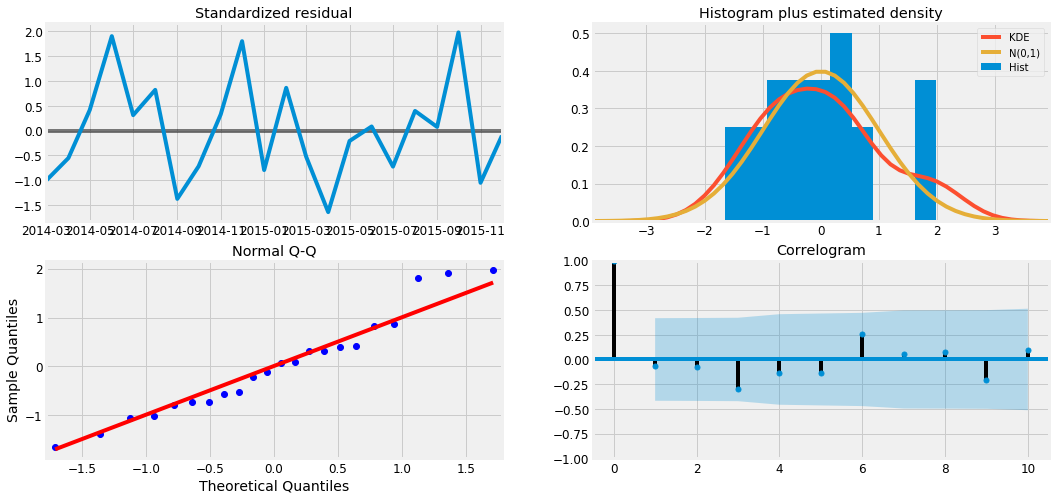

In [63]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [75]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

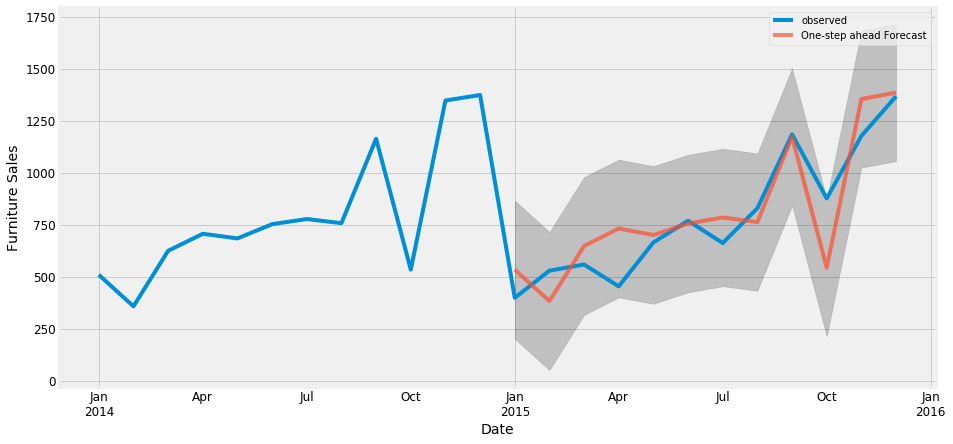

In [76]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

In [78]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 24076.41


In [79]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 155.17


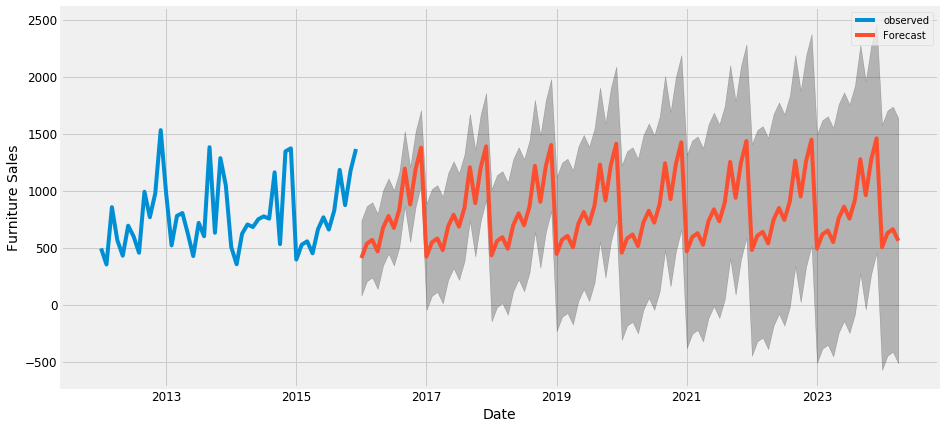

In [80]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()